In [1]:
%reload_ext autoreload
import sys
sys.path.append("../utils/")

# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules

from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
import numpy as np

import functools
import time

from utils import DeviceUtils,DeviceScanner,BraketTaskScanner,Plotter
from hadamard_bench import *
from pyquil import get_qc
from quil_utils import *

import json
import pandas as pd
import seaborn as sns 
import networkx as nx

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
rigetti = DeviceUtils.get_device('rigetti')
ion_q = DeviceUtils.get_device('ionq')
# rigetti = LocalSimulator()
#ion_q = LocalSimulator()

ds = DeviceScanner( device=rigetti)

ds.get_cost_infos()

a:b:c:us-west-1


{'task': 0.3, 'shot': 0.00035}

Big simulation with 80 qubits

In [8]:
shots = 10000
#set_n_qubits = range(3,10)
n_qubits = 80
set_line_length = [10,20,30]
print(set_line_length)

[10, 20, 30]


In [8]:
rigetti_tasks = []
labels = []
for line_length in set_line_length:
    print(line_length)
    
    circ = Circuit().H_line(n_qubits,line_length,'Rigetti')
    circ = Circuit().add_verbatim_box(circ)
   
    rigetti_task = rigetti.run(circ,shots=shots,disable_qubit_rewiring=True)
    rigetti_tasks.append(rigetti_task)
    labels.append( "rigetti_total_" + str(line_length))


10
20
30


ValidationException: An error occurred (ValidationException) when calling the CreateQuantumTask operation: [line 11] Invalid qubit(s): $8

In [5]:

#0 gates circuit
circ = Circuit().h(range(n_qubits)).h(range(n_qubits))

rigetti_task = rigetti.run(circ,shots=shots)
rigetti_tasks.append(rigetti_task)

labels.append( "rigetti_total_0")

NameError: name 'n_qubits' is not defined

In [ ]:
print(rigetti_tasks)
print(labels)

dump_tasks(rigetti_tasks, labels, filename = "H_line_rigetti_total")

[AwsQuantumTask('id/taskArn':'arn:aws:braket:us-west-1:058017682654:quantum-task/34db06be-98ec-4eb2-b216-cf4244063522'), AwsQuantumTask('id/taskArn':'arn:aws:braket:us-west-1:058017682654:quantum-task/2a4690f2-5870-4f2c-a304-2fdeacc69f91'), AwsQuantumTask('id/taskArn':'arn:aws:braket:us-west-1:058017682654:quantum-task/5c29f2df-aa05-4dc9-920c-4321ec0076b0'), AwsQuantumTask('id/taskArn':'arn:aws:braket:us-west-1:058017682654:quantum-task/b6496e25-1f32-421c-b573-3142ad151133')]
['rigetti_total_10', 'rigetti_total_20', 'rigetti_total_30', 'rigetti_total_0']


In [4]:
tasks = load_tasks("H_line_rigetti_total")
scanners = [BraketTaskScanner(qtask = task) for key, task in tasks.items()]

status = [task.get_status() for task in scanners]
cost = [task.cost_extimate() for task in scanners]
print(status, cost)

['COMPLETED', 'COMPLETED', 'COMPLETED', 'COMPLETED'] [Decimal('3.8000000000'), Decimal('3.8000000000'), Decimal('3.8000000000'), Decimal('3.8000000000')]


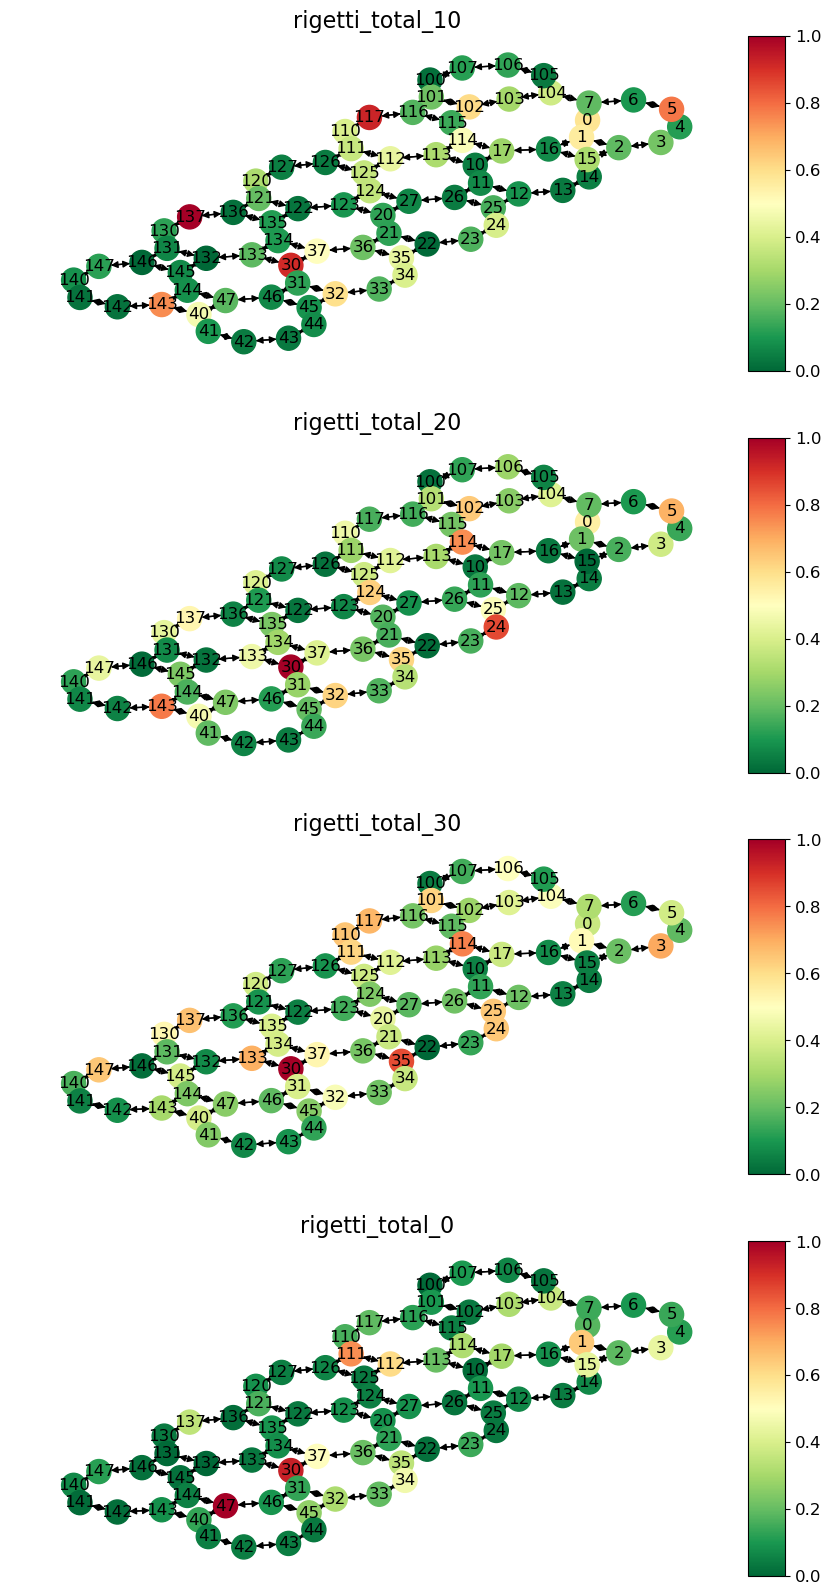

In [5]:
graph = rigetti.topology_graph

fig , axx = plt.subplots(4,1, figsize = (10,20))

for ax, scanner, key in zip(axx,scanners,tasks):
    plot_z_per_qubit(scanner = scanner, ax = ax)
    ax.set_title(key)

    #print(perr[ compilation_map[30]], perr[ compilation_map[143]])
    # if ax == axx[3]:
    #     fig.colorbar(obj)

    #print(perr)


Ionq

In [6]:
tasks = load_tasks("H_line_ionq_grosso")
scanners = [BraketTaskScanner(qtask = task) for key, task in tasks.items()]

status = [task.get_status() for task in scanners]
print(status)

['COMPLETED', 'COMPLETED', 'COMPLETED', 'COMPLETED', 'COMPLETED']


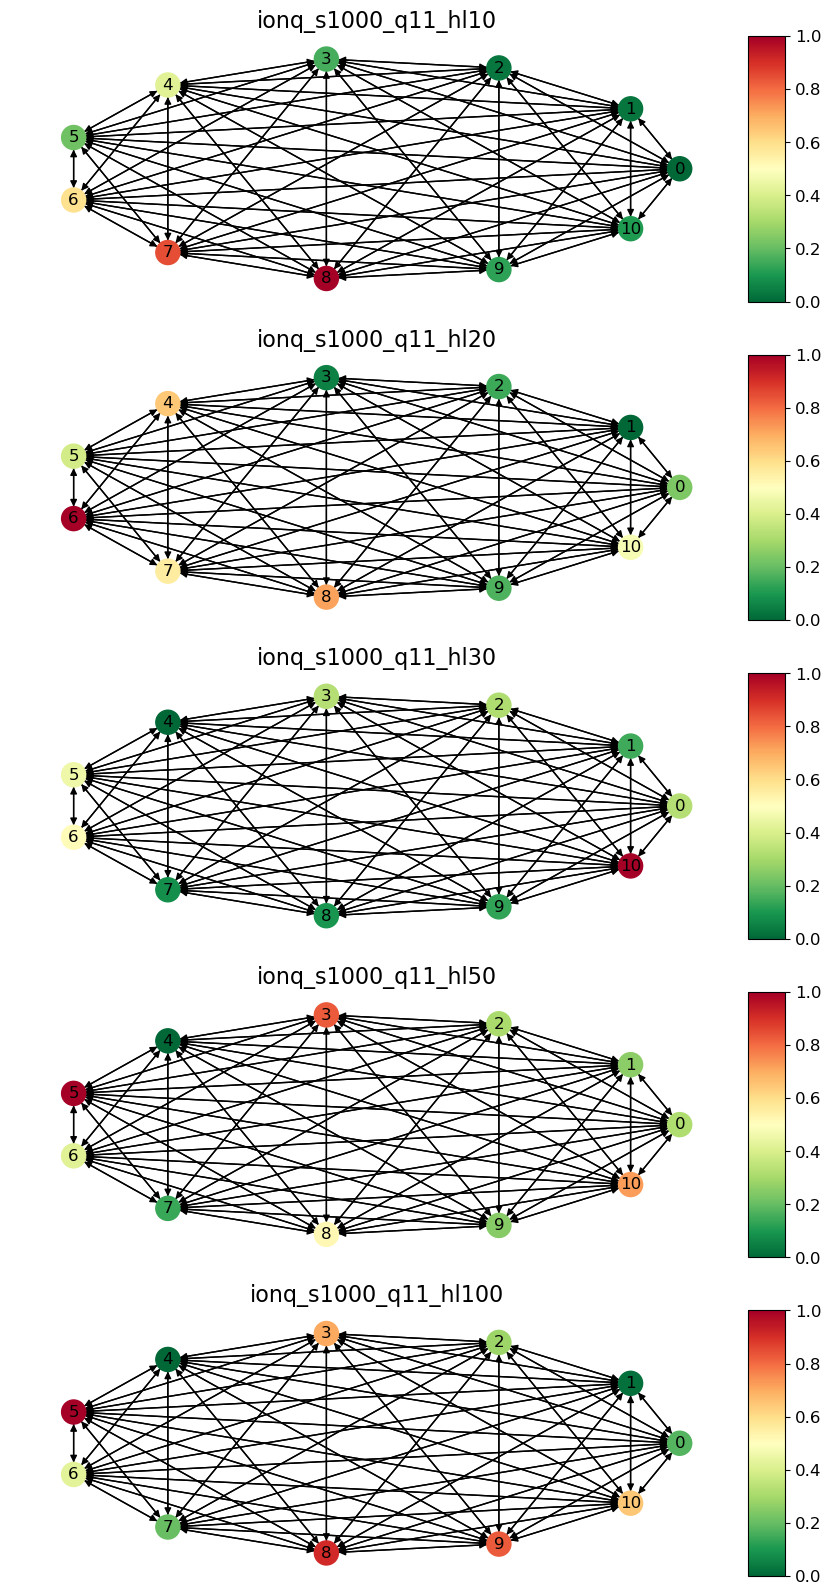

In [8]:
fig, axx = plt.subplots(5,1, figsize = (10,20))
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=plt.Normalize(vmin = 0, vmax=1))

for ax ,scanner, key in zip(axx, scanners,tasks) :

    plot_z_per_qubit(scanner = scanner, ax= ax)
    ax.set_title(key)


Tomography

In [4]:
shots = 1000
#set_n_qubits = range(3,10)
n_qubits = 11
set_line_length = [5,10,15,20,25]
print(set_line_length)

[5, 10, 15, 20, 25]


In [5]:
device = LocalSimulator()

tomo_tasks = []
labels = []
for line_length in set_line_length:
    print(line_length)
    
    circ = Circuit().H_line(n_qubits,line_length,'Rigetti')
    circ = Circuit().add_verbatim_box(circ)

    circ_x, circ_y, circ_z = tomography_circuits(circ, range(n_qubits))

    print(circ_x, circ_y, circ_z)
   
    #rigetti_task = rigetti.run(circ,shots=shots,disable_qubit_rewiring=True)
    #rigetti_tasks.append(rigetti_task)
    labels.append( "rigetti_total_" + str(line_length))

5
T    : |      0      |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   |   11   |   12   |   13   |   14   |   15   |    16     |17|
                                                                                                                                                                            
q0   : -StartVerbatim----------------------------------------------------------------------------------------------------------------------------------------EndVerbatim-H--
        |                                                                                                                                                    |              
q1   : -|----------------------------------------------------------------------------------------------------------------------------------------------------|-----------H--
        |                                                                                                                            

In [ ]:
tasks = load_tasks("H_line_rigetti_total")
scanners = [BraketTaskScanner(qtask = task) for key, task in tasks.items()]

status = [task.get_status() for task in scanners]
cost = [task.cost_extimate() for task in scanners]
print(status, cost)